In [ ]:
import sys
import os

# Add project root
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from validation.validation import *
from src.eda.eda_metrics import *
from src.config.config import *
from src.utils.visualization import *


In [2]:
df = pd.read_csv(
    "../data/processed/indian_machinery_transaction_data_3.csv",
    parse_dates=["invoice_date"]
)

df.head()


,invoice_id,invoice_date,year,month,season,customer_type,brand,product_name,product_category,specification,quantity,mrp,selling_price,unit_cost,discount_pct,revenue,profit
0,500001,2019-01-01,2019,1,Winter,Retail,Supreme,PVC Pipe,Pipe,0.5 inch,1,89.61,83.49,70.69,6.83,83.49,12.80
1,500061,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Heavy Duty,2,2257.78,2224.77,1902.32,1.46,4449.54,644.90
2,500060,2019-01-01,2019,1,Winter,Contractor,Jain,Sprinkler Set,Irrigation,Mini,2,1446.31,1334.39,1222.70,7.74,2668.78,223.38
3,500059,2019-01-01,2019,1,Winter,Farmer,Jain,Sprinkler Set,Irrigation,Mini,1,1446.31,1195.99,1021.78,17.31,1195.99,174.21
4,500058,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Mini,3,1446.31,1423.58,1200.86,1.57,4270.74,668.16


## Shape of the dataset

In [3]:
dataset_shape(df)


{'rows': 223490, 'columns': 17}

## Date range of the dataset

In [4]:
date_range_check(df)


{'min_date': Timestamp('2019-01-01 00:00:00'),
 'max_date': Timestamp('2025-06-30 00:00:00')}

## Revenue share between the customer 

In [5]:
# customer_revenue_share(df)

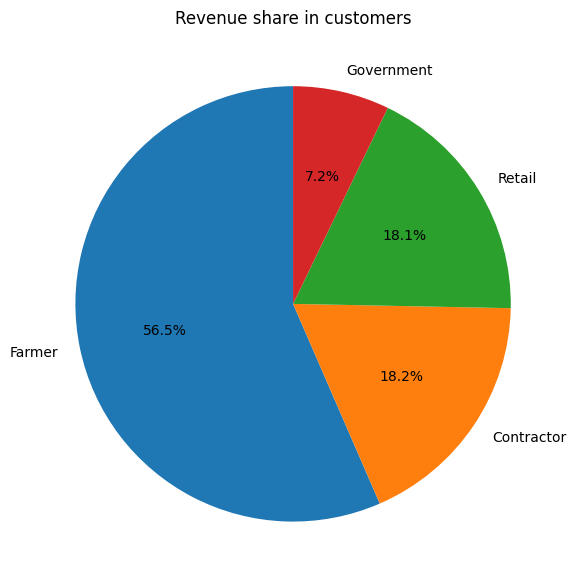

In [6]:
plot_pie_chart(customer_revenue_share(df),title="Revenue share in customers")


## Transaction share w.r.t customer

In [7]:
# customer_transaction_share(df)


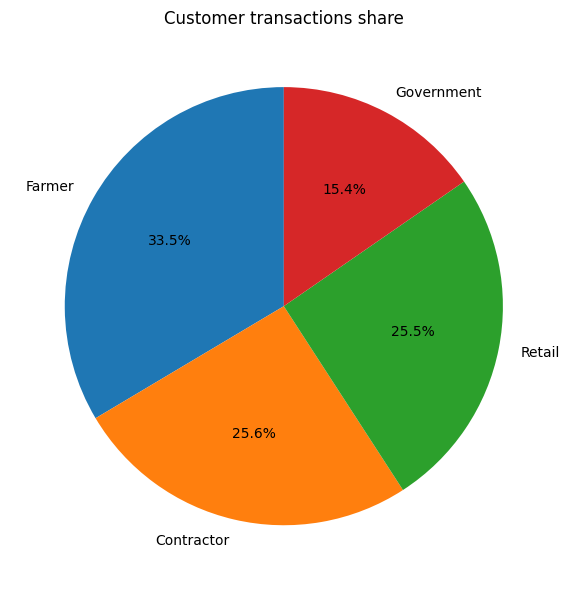

In [8]:
plot_pie_chart(customer_transaction_share(df),title="Customer transactions share")

## Revenue share w.r.t category

In [9]:
# category_revenue_share(df)

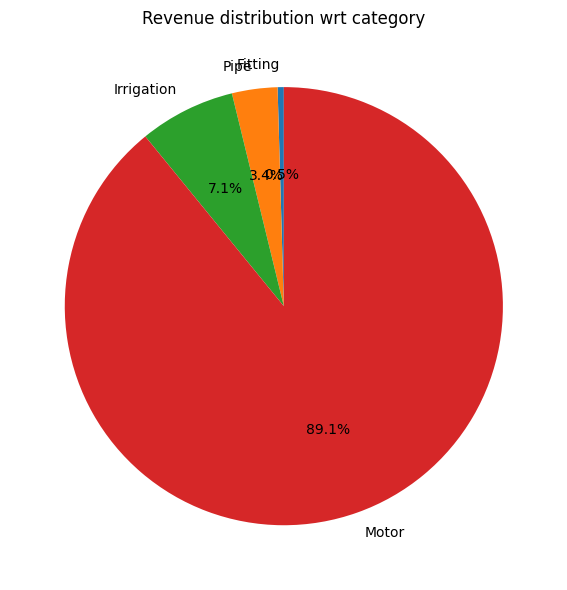

In [10]:
plot_pie_chart(category_revenue_share(df),title='Revenue distribution wrt category')

## Yearly transactions

In [11]:
# yearly_transactions(df)

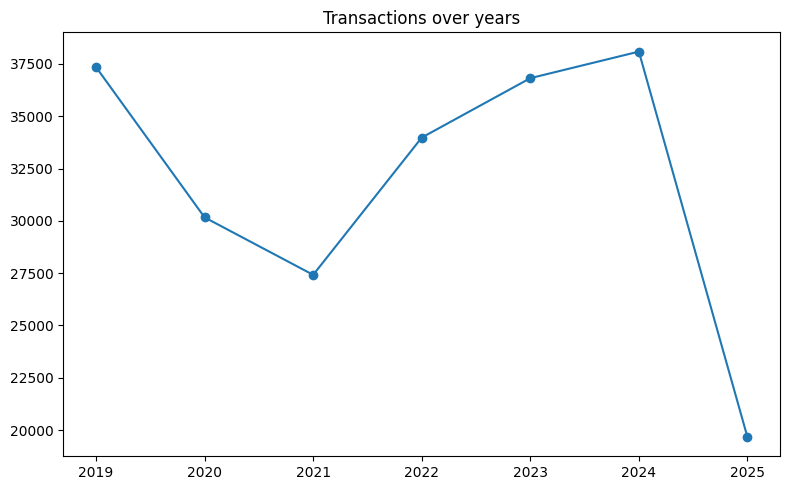

In [12]:
plot_line_chart(yearly_transactions(df),title="Transactions over years")

## Monthly transactions


In [13]:
# monthly_transactions(df)

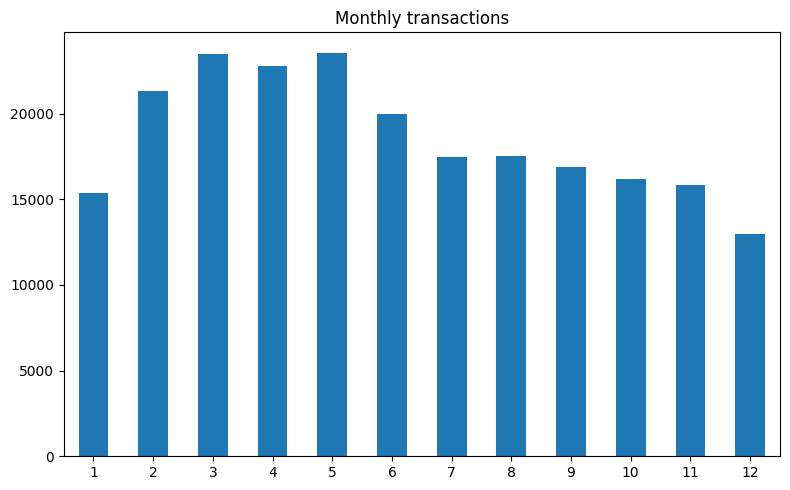

In [14]:
plot_bar_chart(monthly_transactions(df),title="Monthly transactions")

In [15]:
price_below_cost_cases(df)

{'count': 2872, 'percentage': 1.29}

## Avg price trend

In [16]:
# avg_price_trend(df)

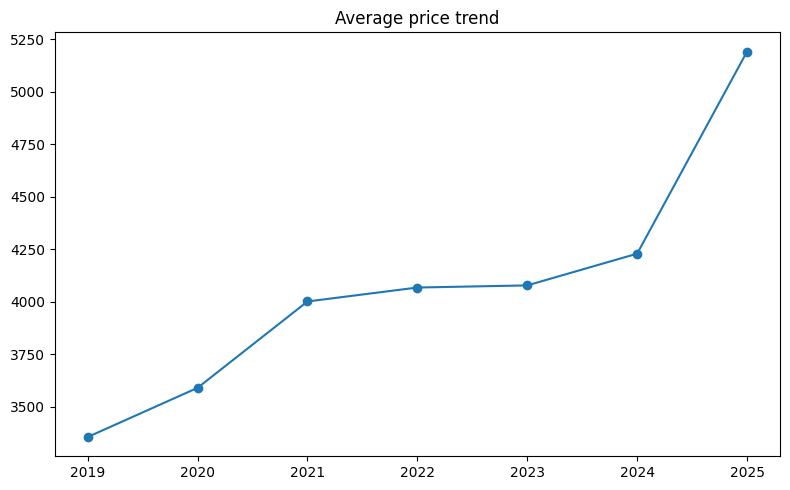

In [17]:
plot_line_chart(avg_price_trend(df),title="Average price trend")

## Transaction distribution w.r.t product

In [18]:
# product_transaction_distribution(df)

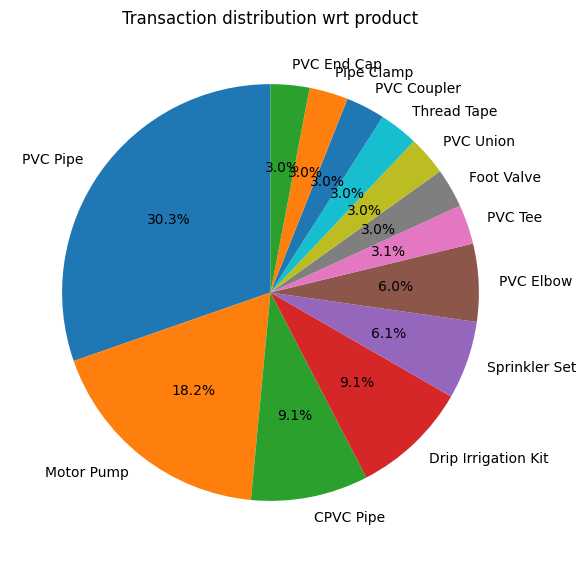

In [19]:
plot_pie_chart(product_transaction_distribution(df),title="Transaction distribution wrt product")

In [20]:
high_price_low_volume_check(df)

,product_name,avg_price,transactions
3,Motor Pump,19623.766397,40608
11,Sprinkler Set,1973.794611,13526
1,Drip Irrigation Kit,1834.912052,20282
7,PVC Pipe,352.660450,67788
2,Foot Valve,341.824312,6806
0,CPVC Pipe,300.761708,20348
9,PVC Union,69.315367,6797
8,PVC Tee,47.933004,6838
5,PVC Elbow,32.016231,13509
4,PVC Coupler,31.954672,6751


## Seasonality Validation


In [21]:
# revenue_by_season(df)

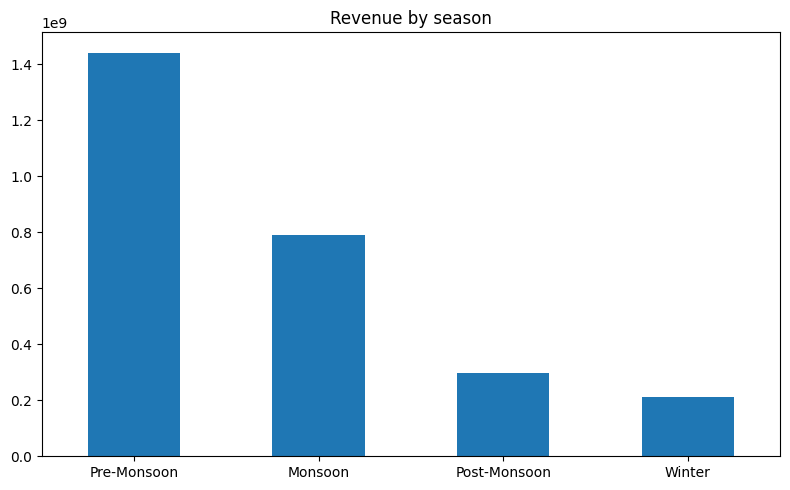

In [22]:
plot_bar_chart(revenue_by_season(df),title="Revenue by season")

## Motor pump revenue by month

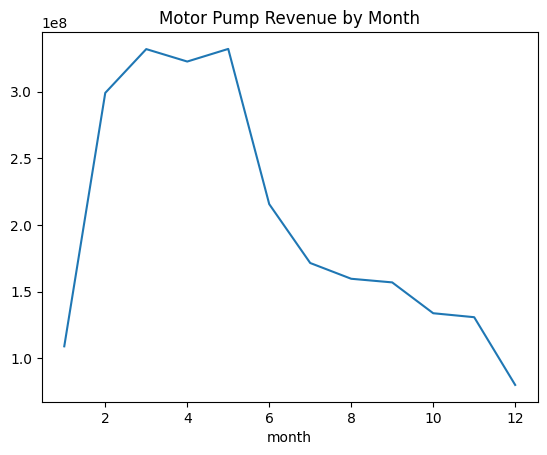

In [23]:
motor = df[df["product_category"] == "Motor"]

motor.groupby("month")["revenue"].sum().plot(
    title="Motor Pump Revenue by Month"
)
plt.show()


## External price shocks

C:\Users\jaipr\AppData\Local\Temp\ipykernel_10616\642551457.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["selling_price"]


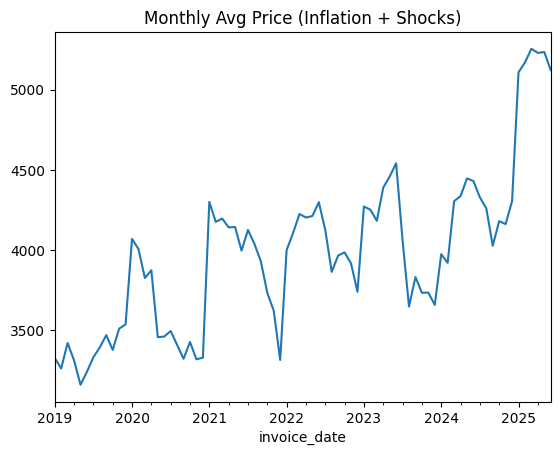

In [24]:
monthly_price = (
    df.set_index("invoice_date")
      .resample("M")["selling_price"]
      .mean()
)

monthly_price.plot(
    title="Monthly Avg Price (Inflation + Shocks)"
)
plt.show()
